In [1]:
import numpy as np
import gc
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
#from sklearn.neighbors import KDTree
import threading
from numpy import linalg as LA
from sympy import Plane, Point3D
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import math
import copy
import sys
import os
from os.path import isfile, join
from scipy.spatial import cKDTree
from scipy.optimize import curve_fit
import scipy
from scipy import integrate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import time

plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 20
plt.rc('figure', facecolor='w')

## Constants in cgs unites
G=6.67408e-8
H=67.26*3.2408e-20
k_B=1.38064852e-16
M_sun=1.99e+33
pc=3.086e18
kpc=3.086e21
Mpc=3.086e24
Gyr=365*24*3600*1e9
Myr=365*24*3600*1e6
m_p=1.6726219e-24
eV=1.602176634e-12
h_bar=1.0545718e-27
R_sun=6.957e+10

h=0.6774

In [2]:
df=pd.read_csv('result-kay90.txt',sep='\s+',header=None)
df

,0,1,2,3,4,5
0,1.0,0.0,0.5,0.1,2.535932,0.438872
1,1.0,0.0,0.5,0.5,2.541630,0.438872
2,1.0,0.0,0.5,1.0,2.543437,0.438872
3,1.0,0.0,0.5,2.0,2.547472,0.438872
4,1.0,0.0,0.5,3.0,2.549080,0.438872
...,...,...,...,...,...,...
149,2.0,0.0,80.0,3.0,0.162351,0.631976
150,2.0,0.0,8.0,4.0,0.495398,0.034182
151,2.0,0.0,80.0,4.0,0.178469,0.526647
152,2.0,0.0,90.0,3.0,NaN,NaN


In [3]:
m_l=df[0]
v=df[2]
r=df[3]
chisq=df[4]

In [4]:
i1=np.where(m_l==1)[0]
i2=np.where(m_l==2)[0]


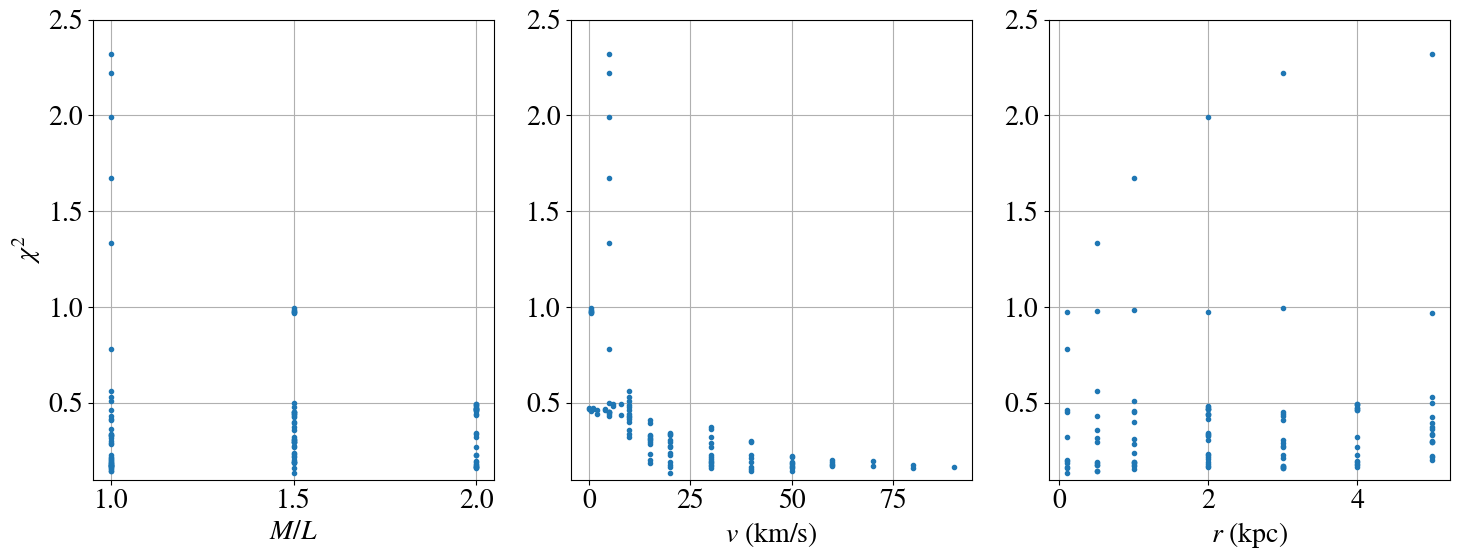

In [7]:
# figure
fig=plt.figure(figsize=(15,6),dpi=100)
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax1.plot(m_l, chisq, '.')

ax2.plot(v, chisq, '.')

ax3.plot(r, chisq, '.')

#ax1.set_xlim(-11,11)
ax1.set_ylim(0.1,2.5)
ax2.set_ylim(0.1,2.5)
ax3.set_ylim(0.1,2.5)

ax1.grid()
ax2.grid()
ax3.grid()


ax1.set_xlabel('$M/L$')
ax2.set_xlabel('$v$ (km/s)')
ax3.set_xlabel('$r$ (kpc)')

ax1.set_ylabel(r'$\chi^{2}$')

plt.tight_layout()

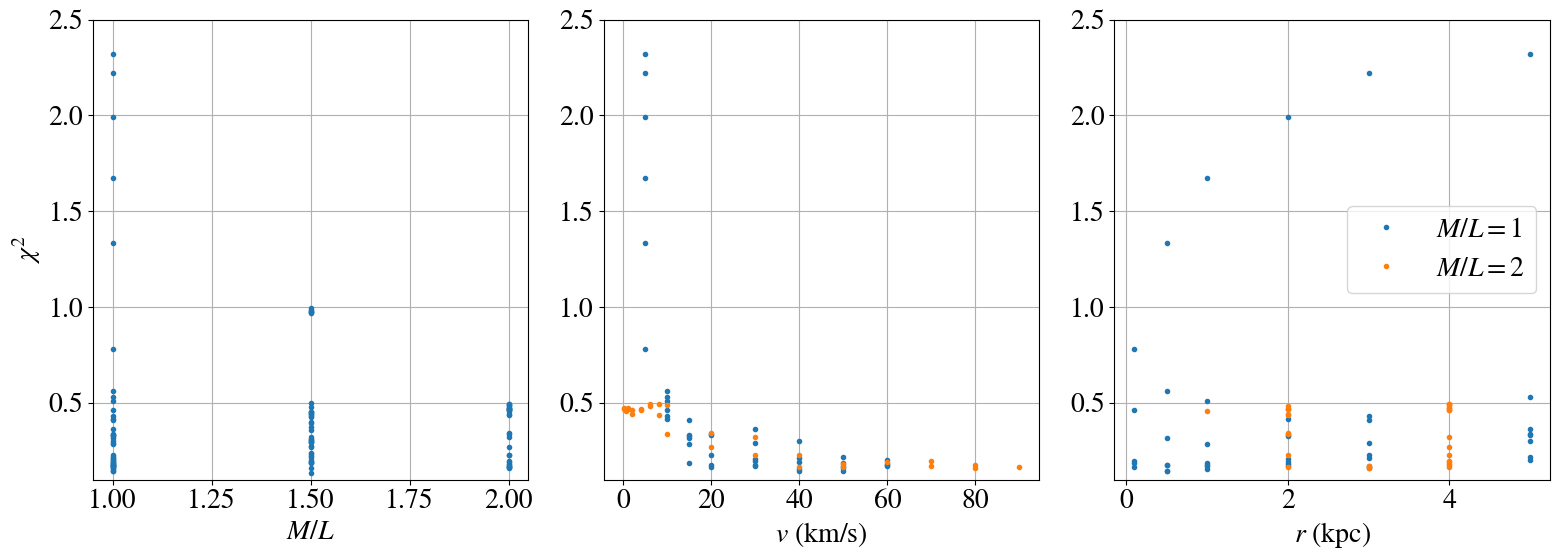

In [10]:
# figure
fig=plt.figure(figsize=(16,6),dpi=100)
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax1.plot(m_l, chisq, '.')

ax2.plot(v[i1], chisq[i1], '.', label='$M/L=1$')
ax2.plot(v[i2], chisq[i2], '.', label='$M/L=2$')

ax3.plot(r[i1], chisq[i1], '.', label='$M/L=1$')
ax3.plot(r[i2], chisq[i2], '.', label='$M/L=2$')

#ax1.set_xlim(-11,11)
ax1.set_ylim(0.1,2.5)
ax2.set_ylim(0.1,2.5)
ax3.set_ylim(0.1,2.5)

ax1.grid()
ax2.grid()
ax3.grid()

#ax2.legend()
ax3.legend()

ax1.set_xlabel('$M/L$')
ax2.set_xlabel('$v$ (km/s)')
ax3.set_xlabel('$r$ (kpc)')

ax1.set_ylabel(r'$\chi^{2}$')

plt.tight_layout()

In [9]:
imin=np.argmin(chisq)
m_l[imin], v[imin], r[imin]

(1.5, 20.0, 0.1)

In [13]:
dM=pd.read_csv('~/scratch/data-kay/mods_90/m1.5b0.0v20r0.1/dMhalo.dat',sep='\s+',header=None)
dM

,0,1,2
0,1,1,4.682854e+03
1,1,2,4.683088e+03
2,1,3,4.683087e+03
3,1,4,4.683088e+03
4,1,5,4.683088e+03
...,...,...,...
1595,80,16,4.934107e+06
1596,80,17,4.934110e+06
1597,80,18,4.934103e+06
1598,80,19,4.934108e+06


In [15]:
dM_total=pd.read_csv('~/scratch/data-kay/mods_90/m1.5b0.0v20r0.1/dM.dat',sep='\s+',header=None)
dM_total

,0,1,2
0,1,1,4.721710e+03
1,1,2,4.721912e+03
2,1,3,4.721876e+03
3,1,4,4.721841e+03
4,1,5,4.721808e+03
...,...,...,...
1595,80,16,4.992967e+06
1596,80,17,4.991203e+06
1597,80,18,4.989178e+06
1598,80,19,4.987012e+06


In [16]:
dL=pd.read_csv('~/scratch/data-kay/mods_90/m1.5b0.0v20r0.1/dL.dat',sep='\s+',header=None)
dL

,0,1,2
0,1,1,25.902000
1,1,2,25.880232
2,1,3,25.857084
3,1,4,25.833822
4,1,5,25.810366
...,...,...,...
1595,80,16,39079.226600
1596,80,17,37882.449200
1597,80,18,36560.066400
1598,80,19,35179.863300


In [17]:
rbin=pd.read_csv('~/scratch/data-kay/mods_90/m1.5b0.0v20r0.1/bindemo_r.out',sep='\s+',header=None,skiprows=4)
rbin

,0,1,2,3,4,5,6
0,0,1,0.000000,0.000000,0.000368,0.0000,0.0735
1,1,1,0.000368,0.000750,0.001142,0.1500,0.2285
2,2,1,0.001142,0.001542,0.001952,0.3083,0.3905
3,3,1,0.001952,0.002377,0.002813,0.4754,0.5625
4,4,1,0.002813,0.003259,0.003718,0.6518,0.7435
...,...,...,...,...,...,...,...
77,77,20,0.825588,0.848534,0.872108,169.7068,174.4215
78,78,20,0.872108,0.896324,0.921202,179.2648,184.2405
79,79,20,0.921202,0.946763,0.973023,189.3526,194.6045
80,80,20,0.973023,0.999999,1.027712,199.9997,205.5425


In [18]:
r_list=rbin[6][1:81]*20e3/206625

M_list=np.array(dM[2])
Mstar_list=np.array(dM[2])
L_list=np.array(dL[2])
for i in range(dM[2].shape[0]):
    M_list[i]=np.sum(dM[2][:i])
    Mstar_list[i]=np.sum(dM_total[2][:i]-dM[2][:i])
    L_list[i]=np.sum(dL[2][:i])

M_list=M_list[19::20]
Mstar_list=Mstar_list[19::20]
L_list=L_list[19::20]
r_list.shape, M_list.shape, Mstar_list.shape

((80,), (80,), (80,))

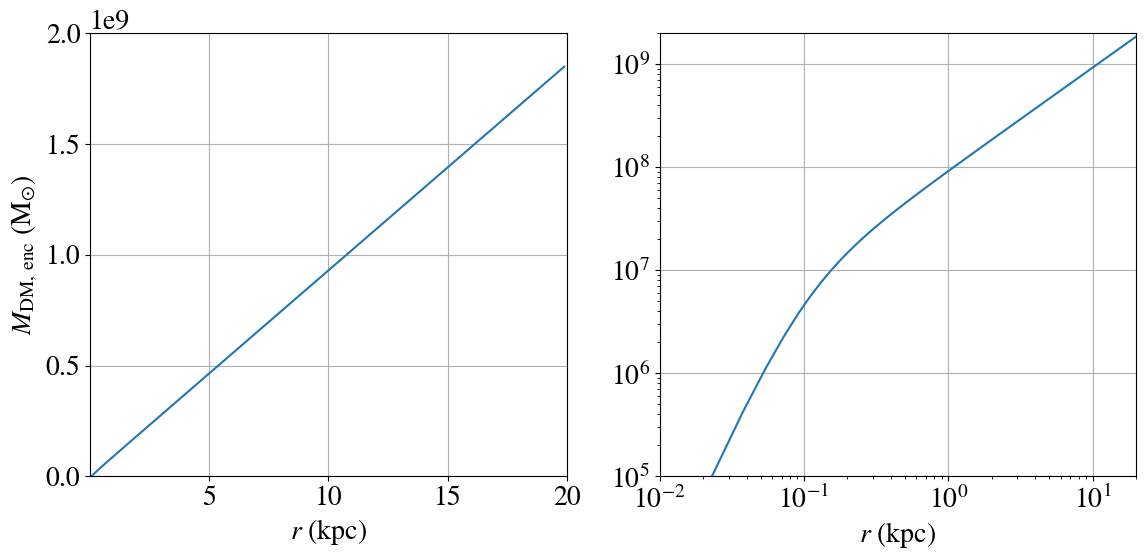

In [20]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,M_list)
ax2.plot(r_list,M_list)

ax1.set_xlim(1e-2,20)
ax1.set_ylim(0,2e9)
ax2.set_xlim(1e-2,20)
ax2.set_ylim(1e5,2e9)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_{\rm DM,\,enc}$ (M$_{\odot}$)')

plt.tight_layout()

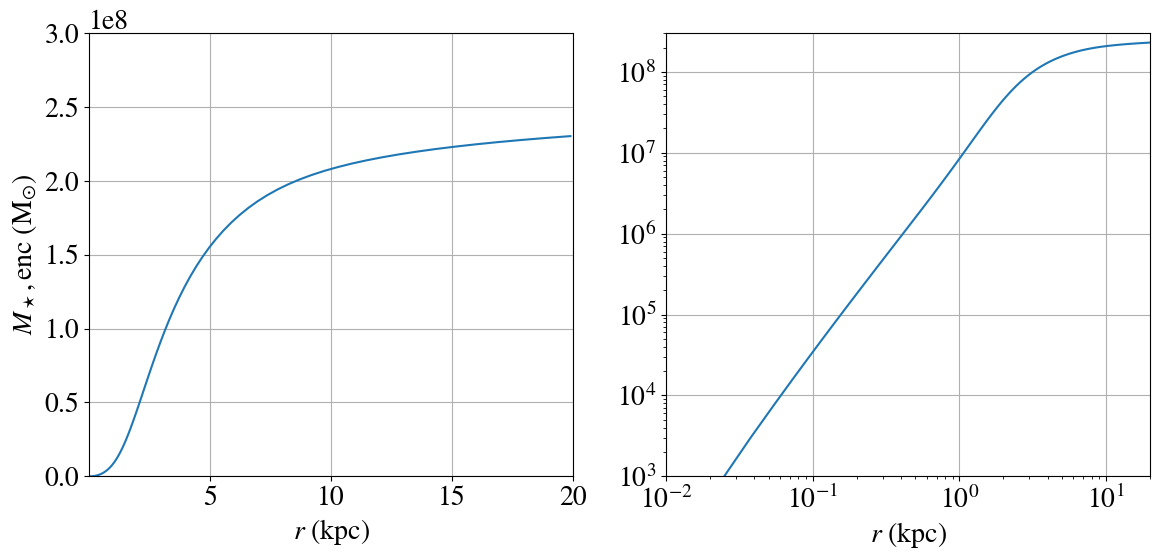

In [23]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,Mstar_list)
ax2.plot(r_list,Mstar_list)

ax1.set_xlim(1e-2,20)
ax1.set_ylim(0,3e8)
ax2.set_xlim(1e-2,20)
ax2.set_ylim(1e3,3e8)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_\star{\rm,enc}$ (M$_{\odot}$)')

plt.tight_layout()

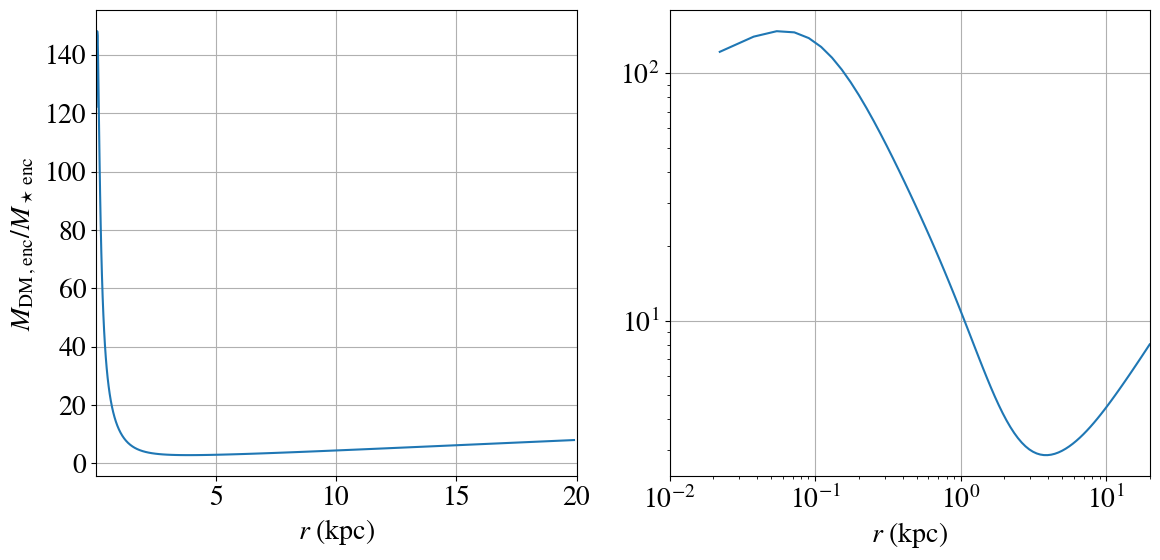

In [25]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,M_list/Mstar_list)
ax2.plot(r_list,M_list/Mstar_list)

ax1.set_xlim(1e-2,20)
#ax1.set_ylim(0,5e9)
ax2.set_xlim(1e-2,20)
#ax2.set_ylim(1e4,5e9)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_{\rm DM \, ,enc}/M_{\rm \star \, enc}$')
ax2.set_xlabel('$r$ (kpc)')

plt.tight_layout()

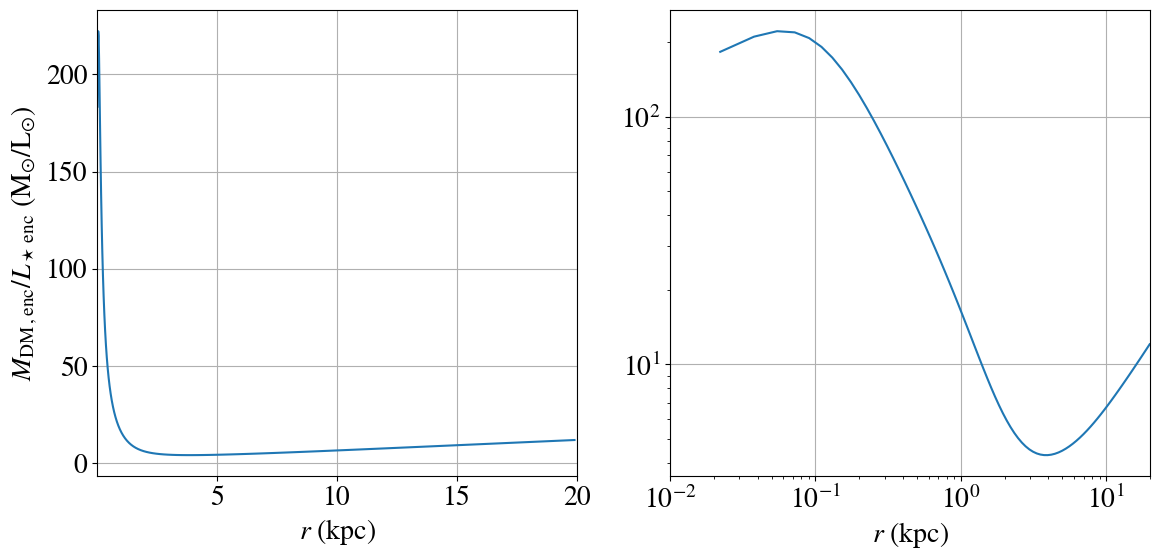

In [26]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,M_list/L_list)
ax2.plot(r_list,M_list/L_list)

ax1.set_xlim(1e-2,20)
#ax1.set_ylim(0,5e9)
ax2.set_xlim(1e-2,20)
#ax2.set_ylim(1e4,5e9)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_{\rm DM \, ,enc}/L_{\rm \star \,enc}$ (M$_{\odot}$/L$_{\odot}$)')
ax2.set_xlabel('$r$ (kpc)')

plt.tight_layout()

In [27]:
M_list, Mstar_list

(array([8.89784336e+04, 4.24707552e+05, 1.12849704e+06, 2.24082214e+06,
        3.73174599e+06, 5.53617064e+06, 7.58651104e+06, 9.82847938e+06,
        1.22251148e+07, 1.47551544e+07, 1.74080927e+07, 2.01815554e+07,
        2.30780120e+07, 2.61032152e+07, 2.92650250e+07, 3.25726454e+07,
        3.60362312e+07, 3.96666355e+07, 4.34753102e+07, 4.74742168e+07,
        5.16758436e+07, 5.60932008e+07, 6.07398666e+07, 6.56299920e+07,
        7.07783345e+07, 7.62003723e+07, 8.19123367e+07, 8.79312399e+07,
        9.42749664e+07, 1.00962210e+08, 1.08012699e+08, 1.15447203e+08,
        1.23287578e+08, 1.31556779e+08, 1.40279048e+08, 1.49479901e+08,
        1.59186277e+08, 1.69426472e+08, 1.80230415e+08, 1.91629679e+08,
        2.03657490e+08, 2.16348913e+08, 2.29740992e+08, 2.43872723e+08,
        2.58785343e+08, 2.74522267e+08, 2.91129381e+08, 3.08655031e+08,
        3.27150324e+08, 3.46669116e+08, 3.67268240e+08, 3.89007709e+08,
        4.11950851e+08, 4.36164454e+08, 4.61719110e+08, 4.886891

In [29]:
index=np.where(r_list>7.8)[0][0]
r_list[index], M_list[index]/1e9

(7.793393829401089, 0.76580629128376)

In [30]:
df_int=pd.read_csv('~/scratch/data-kay/mods_90/m1.5b0.0v20r0.1/intmom.out',sep='\s+',header=0)
r=np.array(df_int['R'])*20e3/206625
beta=np.array(df_int['beta'])
theta=np.array(df_int['Theta'])

beta_mean=(beta[:20]+beta[20:40]+beta[40:60]+beta[60:80]+beta[80:100])/5

df_int

,R,Theta,V_r,V_theta,V_rV_t,V_phi,v_phi,beta
0,0.41,5.77,14.3166,10.2289,0.0,11.8915,0.0,0.3998
1,1.16,5.77,10.1386,11.3936,0.0,10.4759,0.0,-0.1653
2,2.09,5.77,7.5942,12.2688,0.0,12.2079,0.0,-1.5971
3,3.24,5.77,4.5617,14.6203,0.0,12.4103,0.0,-7.8369
4,4.68,5.77,5.1080,16.1624,0.0,15.5992,0.0,-8.6688
...,...,...,...,...,...,...,...,...
95,76.60,71.57,11.0343,10.9625,0.0,11.4316,0.0,-0.0302
96,95.71,71.57,11.4494,10.4810,0.0,10.9183,0.0,0.1263
97,119.41,71.57,11.6354,9.8204,0.0,10.0827,0.0,0.2684
98,148.83,71.57,11.2960,8.6548,0.0,9.1235,0.0,0.3803


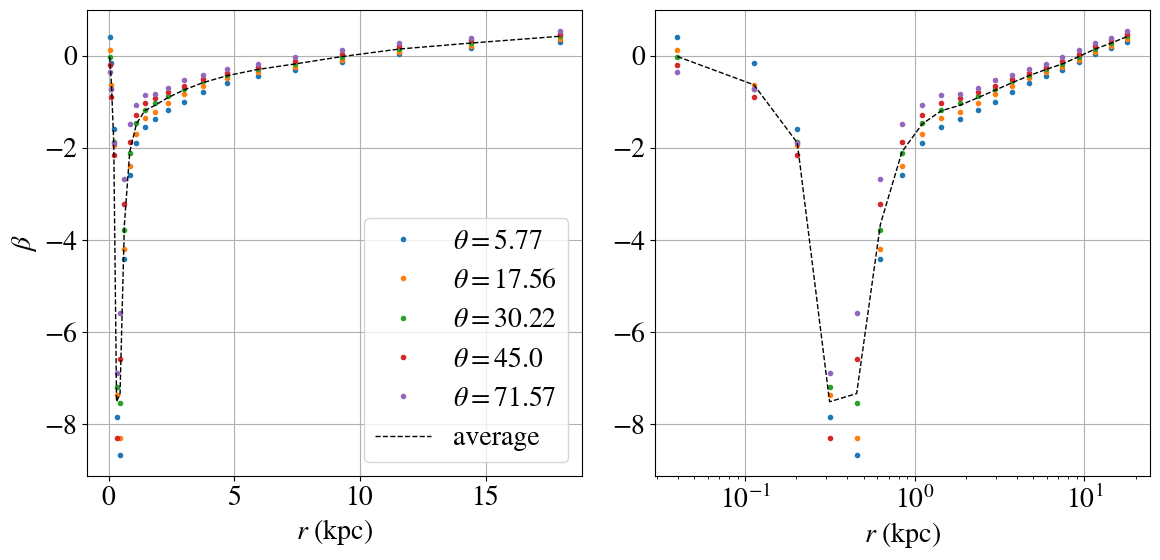

In [31]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)


ax1.plot(r[:20], beta[:20], '.', label=r'$\theta={}$'.format(theta[0]))
ax1.plot(r[20:40], beta[20:40], '.', label=r'$\theta={}$'.format(theta[20]))
ax1.plot(r[40:60], beta[40:60], '.', label=r'$\theta={}$'.format(theta[40]))
ax1.plot(r[60:80], beta[60:80], '.', label=r'$\theta={}$'.format(theta[60]))
ax1.plot(r[80:100], beta[80:100], '.', label=r'$\theta={}$'.format(theta[80]))
ax1.plot(r[:20], beta_mean, 'k--', lw=1, label=r'average')


ax2.plot(r[:20], beta[:20], '.', label=r'$\theta={}$'.format(theta[0]))
ax2.plot(r[20:40], beta[20:40], '.', label=r'$\theta={}$'.format(theta[20]))
ax2.plot(r[40:60], beta[40:60], '.', label=r'$\theta={}$'.format(theta[40]))
ax2.plot(r[60:80], beta[60:80], '.', label=r'$\theta={}$'.format(theta[60]))
ax2.plot(r[80:100], beta[80:100], '.', label=r'$\theta={}$'.format(theta[80]))
ax2.plot(r[:20], beta_mean, 'k--', lw=1, label=r'mean')

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()
ax2.grid()
ax1.legend()

ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$\beta$')

ax2.set_xscale('log')

plt.tight_layout()

In [33]:
df1=pd.read_csv('result-kay20.txt',sep='\s+',header=None)
m_l=df1[0]
v=df1[2]
r=df1[3]
chisq=df1[4]
df1

,0,1,2,3,4,5
0,1.2,0.0,10.0,2.0,0.350927,0.304772
1,1.2,0.0,20.0,2.0,0.217606,0.176373
2,1.2,0.0,30.0,2.0,0.180332,0.211647
3,1.2,0.0,40.0,2.0,0.145351,0.365727
4,1.2,0.0,50.0,2.0,0.173657,0.438872
...,...,...,...,...,...,...
141,2.0,0.0,60.0,0.1,NaN,NaN
142,2.0,0.0,60.0,0.2,NaN,NaN
143,2.0,0.0,60.0,0.3,NaN,NaN
144,2.0,0.0,60.0,0.5,NaN,NaN


In [35]:
i1=np.where(m_l==1)[0]
i2=np.where(m_l==2)[0]


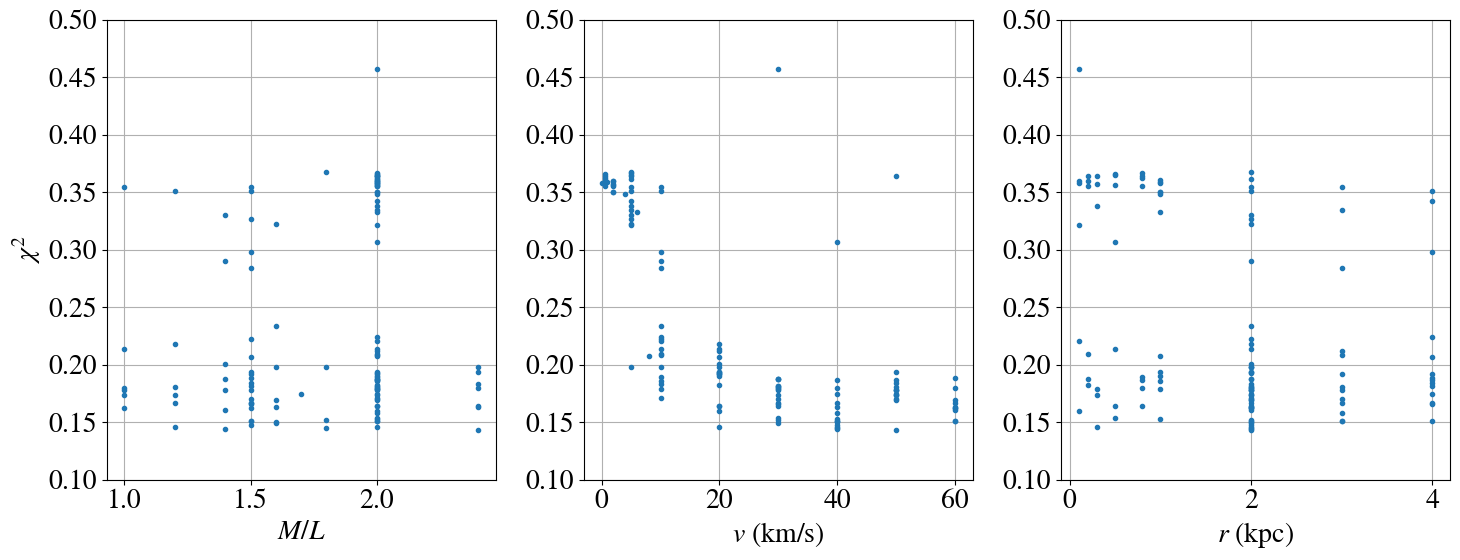

In [38]:
# figure
fig=plt.figure(figsize=(15,6),dpi=100)
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax1.plot(m_l, chisq, '.')

ax2.plot(v, chisq, '.')

ax3.plot(r, chisq, '.')

#ax1.set_xlim(-11,11)
ax1.set_ylim(0.1,0.5)
ax2.set_ylim(0.1,0.5)
ax3.set_ylim(0.1,0.5)

ax1.grid()
ax2.grid()
ax3.grid()


ax1.set_xlabel('$M/L$')
ax2.set_xlabel('$v$ (km/s)')
ax3.set_xlabel('$r$ (kpc)')

ax1.set_ylabel(r'$\chi^{2}$')

plt.tight_layout()

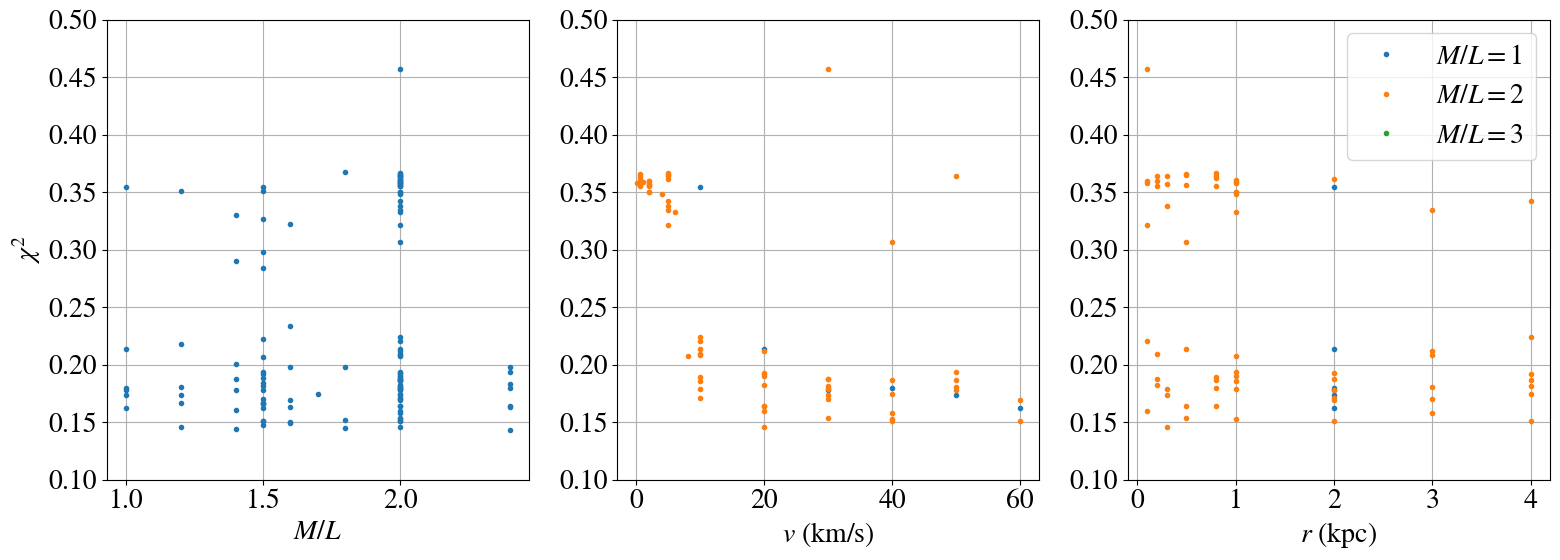

In [39]:
# figure
fig=plt.figure(figsize=(16,6),dpi=100)
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax1.plot(m_l, chisq, '.')

ax2.plot(v[i1], chisq[i1], '.', label='$M/L=1$')
ax2.plot(v[i2], chisq[i2], '.', label='$M/L=2$')
ax2.plot(v[i3], chisq[i3], '.', label='$M/L=3$')

ax3.plot(r[i1], chisq[i1], '.', label='$M/L=1$')
ax3.plot(r[i2], chisq[i2], '.', label='$M/L=2$')
ax3.plot(r[i3], chisq[i3], '.', label='$M/L=3$')

#ax1.set_xlim(-11,11)
ax1.set_ylim(0.1,0.5)
ax2.set_ylim(0.1,0.5)
ax3.set_ylim(0.1,0.5)

ax1.grid()
ax2.grid()
ax3.grid()

ax3.legend()

ax1.set_xlabel('$M/L$')
ax2.set_xlabel('$v$ (km/s)')
ax3.set_xlabel('$r$ (kpc)')

ax1.set_ylabel(r'$\chi^{2}$')

plt.tight_layout()

In [41]:
imin=np.argmin(chisq)
m_l[imin], v[imin], r[imin]

(2.4, 50.0, 2.0)

In [43]:
dM=pd.read_csv('~/scratch/data-kay/mods_20/m2.4b0.0v50r2/dMhalo.dat',sep='\s+',header=None)
dM

,0,1,2
0,1,1,7.690424e+01
1,1,2,7.690809e+01
2,1,3,7.690807e+01
3,1,4,7.690809e+01
4,1,5,7.690809e+01
...,...,...,...
1595,80,16,3.115571e+07
1596,80,17,3.115573e+07
1597,80,18,3.115570e+07
1598,80,19,3.115573e+07


In [44]:
dM_total=pd.read_csv('~/scratch/data-kay/mods_20/m2.4b0.0v50r2/dM.dat',sep='\s+',header=None)
dM_total

,0,1,2
0,1,1,1.390733e+02
1,1,2,1.390250e+02
2,1,3,1.389695e+02
3,1,4,1.389137e+02
4,1,5,1.388574e+02
...,...,...,...
1595,80,16,3.124989e+07
1596,80,17,3.124708e+07
1597,80,18,3.124381e+07
1598,80,19,3.124037e+07


In [45]:
dL=pd.read_csv('~/scratch/data-kay/mods_20/m2.4b0.0v50r2/dL.dat',sep='\s+',header=None)
dL

,0,1,2
0,1,1,25.902000
1,1,2,25.880232
2,1,3,25.857084
3,1,4,25.833822
4,1,5,25.810366
...,...,...,...
1595,80,16,39079.226600
1596,80,17,37882.449200
1597,80,18,36560.066400
1598,80,19,35179.863300


In [46]:
rbin=pd.read_csv('~/scratch/data-kay/mods_20/m2.4b0.0v50r2/bindemo_r.out',sep='\s+',header=None,skiprows=4)
rbin

,0,1,2,3,4,5,6
0,0,1,0.000000,0.000000,0.000368,0.0000,0.0735
1,1,1,0.000368,0.000750,0.001142,0.1500,0.2285
2,2,1,0.001142,0.001542,0.001952,0.3083,0.3905
3,3,1,0.001952,0.002377,0.002813,0.4754,0.5625
4,4,1,0.002813,0.003259,0.003718,0.6518,0.7435
...,...,...,...,...,...,...,...
77,77,20,0.825588,0.848534,0.872108,169.7068,174.4215
78,78,20,0.872108,0.896324,0.921202,179.2648,184.2405
79,79,20,0.921202,0.946763,0.973023,189.3526,194.6045
80,80,20,0.973023,0.999999,1.027712,199.9997,205.5425


In [47]:
r_list=rbin[6][1:81]*20e3/206625

M_list=np.array(dM[2])
Mstar_list=np.array(dM[2])
L_list=np.array(dL[2])
for i in range(dM[2].shape[0]):
    M_list[i]=np.sum(dM[2][:i])
    Mstar_list[i]=np.sum(dM_total[2][:i]-dM[2][:i])
    L_list[i]=np.sum(dL[2][:i])

M_list=M_list[19::20]
Mstar_list=Mstar_list[19::20]
L_list=L_list[19::20]
r_list.shape, M_list.shape, Mstar_list.shape

((80,), (80,), (80,))

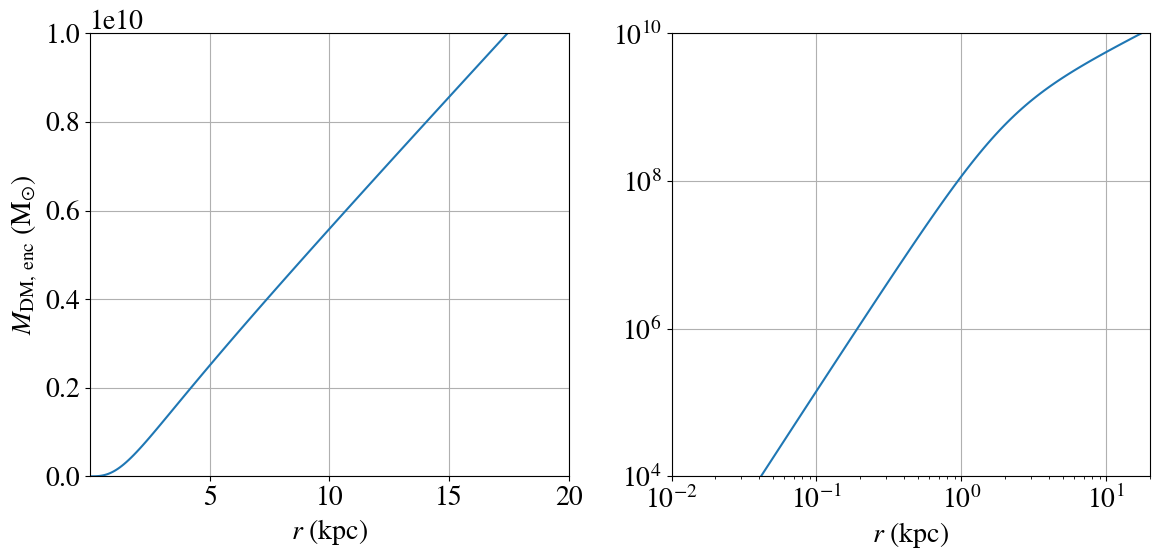

In [55]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,M_list)
ax2.plot(r_list,M_list)

ax1.set_xlim(1e-2,20)
ax1.set_ylim(0,10e9)
ax2.set_xlim(1e-2,20)
ax2.set_ylim(1e4,10e9)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_{\rm DM,\,enc}$ (M$_{\odot}$)')

plt.tight_layout()

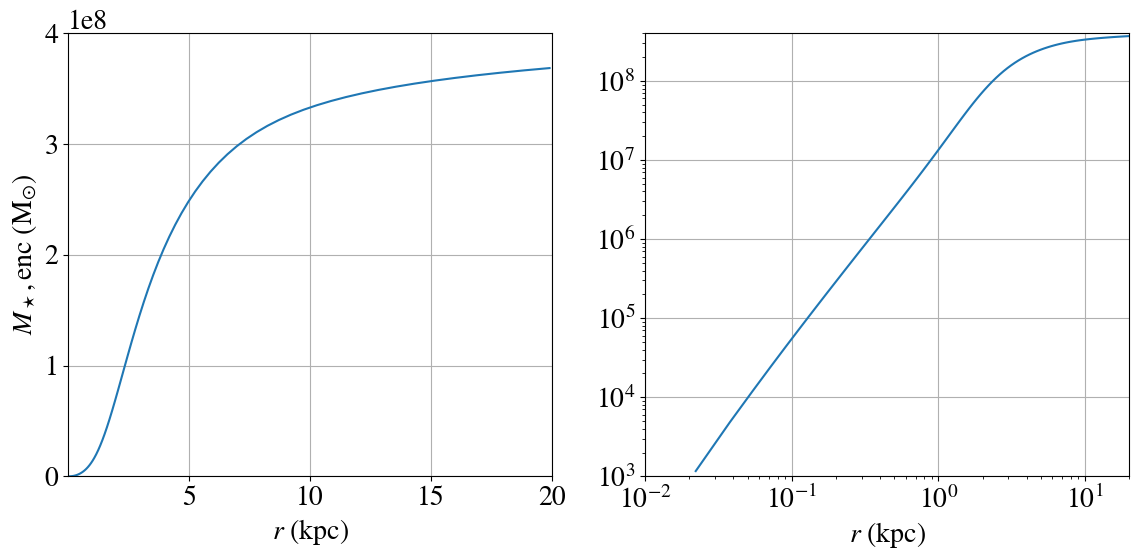

In [59]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,Mstar_list)
ax2.plot(r_list,Mstar_list)

ax1.set_xlim(1e-2,20)
ax1.set_ylim(0,4e8)
ax2.set_xlim(1e-2,20)
ax2.set_ylim(1e3,4e8)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_\star{\rm,enc}$ (M$_{\odot}$)')

plt.tight_layout()

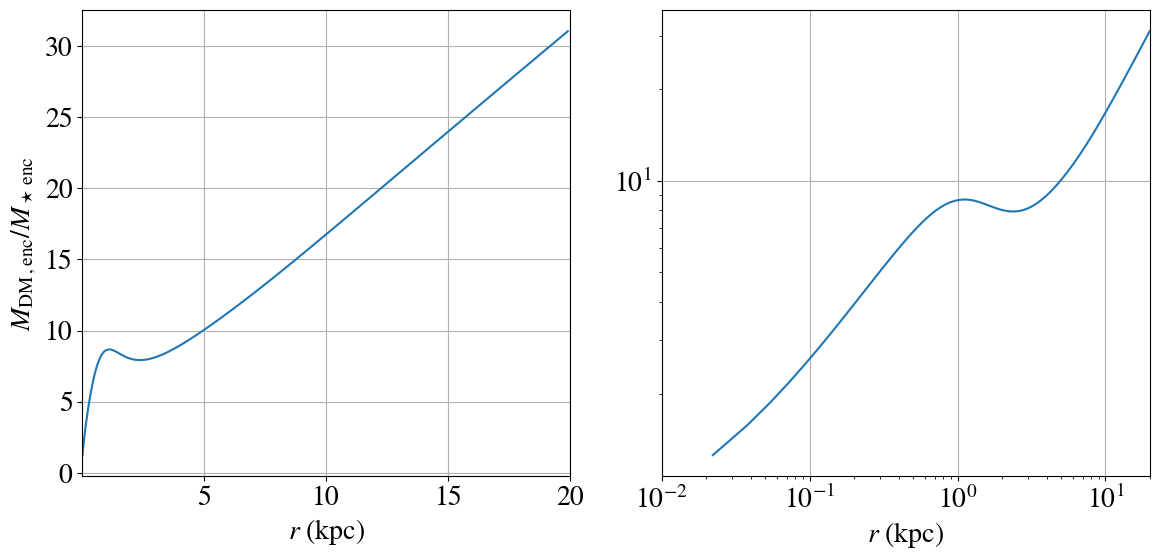

In [58]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,M_list/Mstar_list)
ax2.plot(r_list,M_list/Mstar_list)

ax1.set_xlim(1e-2,20)
#ax1.set_ylim(0,5e9)
ax2.set_xlim(1e-2,20)
#ax2.set_ylim(1e4,5e9)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_{\rm DM \, ,enc}/M_{\rm \star \, enc}$')
ax2.set_xlabel('$r$ (kpc)')

plt.tight_layout()

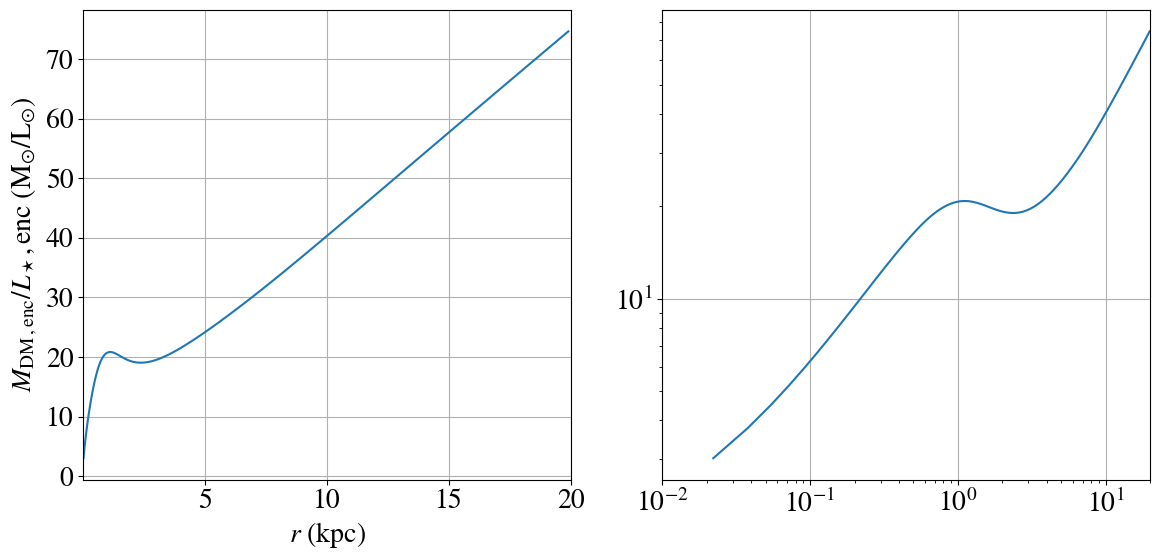

In [60]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.plot(r_list,M_list/L_list)
ax2.plot(r_list,M_list/L_list)

ax1.set_xlim(1e-2,20)
#ax1.set_ylim(0,5e9)
ax2.set_xlim(1e-2,20)
#ax2.set_ylim(1e4,5e9)

ax1.grid()
ax2.grid()

ax2.set_xscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$M_{\rm DM \, ,enc}/L_\star{\rm,enc}$ (M$_{\odot}$/L$_{\odot}$)')

plt.tight_layout()

In [61]:
M_list, Mstar_list

(array([1.46124964e+03, 7.59415400e+03, 2.28552775e+04, 5.30658860e+04,
        1.05709689e+05, 1.90291448e+05, 3.18760065e+05, 5.06003473e+05,
        7.70424523e+05, 1.13461420e+06, 1.62610703e+06, 2.27828089e+06,
        3.13132359e+06, 4.23333762e+06, 5.64159809e+06, 7.42387164e+06,
        9.65986585e+06, 1.24427266e+07, 1.58806313e+07, 2.00983261e+07,
        2.52386309e+07, 3.14637477e+07, 3.89563004e+07, 4.79199823e+07,
        5.85809838e+07, 7.11869576e+07, 8.60055928e+07, 1.03322244e+08,
        1.23436516e+08, 1.46666942e+08, 1.73340219e+08, 2.03780884e+08,
        2.38305502e+08, 2.77242577e+08, 3.20903163e+08, 3.69563707e+08,
        4.23478507e+08, 4.82917045e+08, 5.48082592e+08, 6.19136659e+08,
        6.96271491e+08, 7.79627641e+08, 8.69292829e+08, 9.65397265e+08,
        1.06805505e+09, 1.17733090e+09, 1.29334706e+09, 1.41623596e+09,
        1.54610107e+09, 1.68311653e+09, 1.82747298e+09, 1.97936302e+09,
        2.13905170e+09, 2.30681997e+09, 2.48298046e+09, 2.667903

In [62]:
index=np.where(r_list>7.8)[0][0]
r_list[index], M_list[index]/1e9

(7.793393829401089, 4.519339547699205)

In [63]:
df_int=pd.read_csv('~/scratch/data-kay/mods_20/m2.4b0.0v50r2/intmom.out',sep='\s+',header=0)
r=np.array(df_int['R'])*20e3/206625
beta=np.array(df_int['beta'])
theta=np.array(df_int['Theta'])

beta_mean=(beta[:20]+beta[20:40]+beta[40:60]+beta[60:80]+beta[80:100])/5

df_int

,R,Theta,V_r,V_theta,V_rV_t,V_phi,v_phi,beta
0,0.41,5.77,18.2386,7.3540,0.0,15.2198,0.0,0.5705
1,1.16,5.77,17.8392,8.6193,0.0,15.2039,0.0,0.5201
2,2.09,5.77,17.3713,9.0396,0.0,13.6745,0.0,0.5548
3,3.24,5.77,16.3185,8.3874,0.0,15.7393,0.0,0.4028
4,4.68,5.77,15.5004,11.1744,0.0,17.9114,0.0,0.0725
...,...,...,...,...,...,...,...,...
95,76.60,71.57,22.2665,27.7293,0.0,31.6259,0.0,-0.7841
96,95.71,71.57,24.5707,26.2072,0.0,29.3002,0.0,-0.2798
97,119.41,71.57,26.1324,24.5070,0.0,26.3260,0.0,0.0528
98,148.83,71.57,26.0311,21.6882,0.0,23.2961,0.0,0.2525


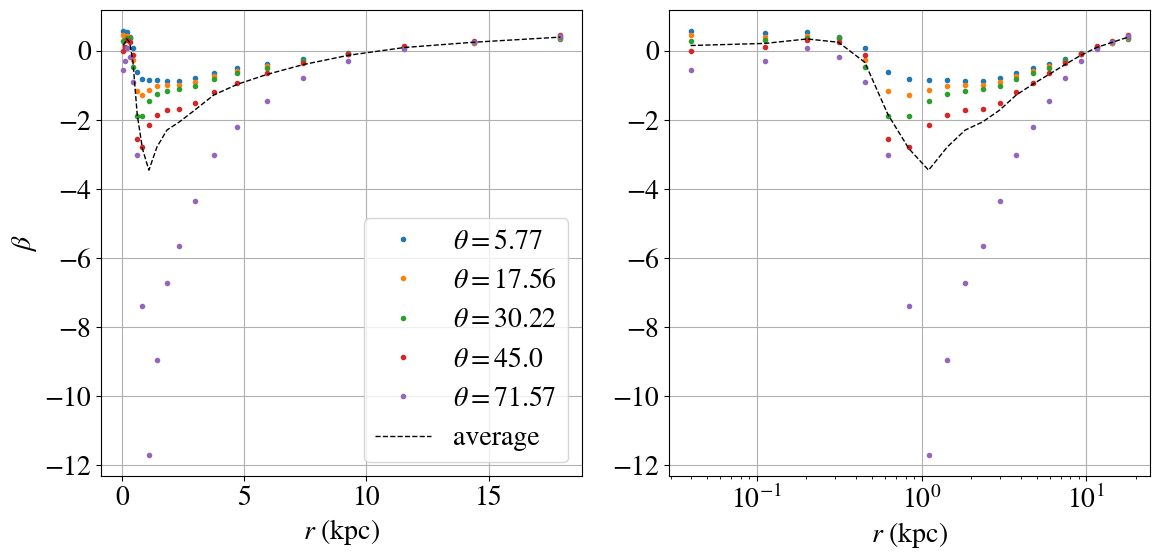

In [64]:
# figure
fig=plt.figure(figsize=(12,6),dpi=100)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)


ax1.plot(r[:20], beta[:20], '.', label=r'$\theta={}$'.format(theta[0]))
ax1.plot(r[20:40], beta[20:40], '.', label=r'$\theta={}$'.format(theta[20]))
ax1.plot(r[40:60], beta[40:60], '.', label=r'$\theta={}$'.format(theta[40]))
ax1.plot(r[60:80], beta[60:80], '.', label=r'$\theta={}$'.format(theta[60]))
ax1.plot(r[80:100], beta[80:100], '.', label=r'$\theta={}$'.format(theta[80]))
ax1.plot(r[:20], beta_mean, 'k--', lw=1, label=r'average')


ax2.plot(r[:20], beta[:20], '.', label=r'$\theta={}$'.format(theta[0]))
ax2.plot(r[20:40], beta[20:40], '.', label=r'$\theta={}$'.format(theta[20]))
ax2.plot(r[40:60], beta[40:60], '.', label=r'$\theta={}$'.format(theta[40]))
ax2.plot(r[60:80], beta[60:80], '.', label=r'$\theta={}$'.format(theta[60]))
ax2.plot(r[80:100], beta[80:100], '.', label=r'$\theta={}$'.format(theta[80]))
ax2.plot(r[:20], beta_mean, 'k--', lw=1, label=r'mean')

#ax1.set_xlim(-11,11)
#ax1.set_ylim(-11,11)

ax1.grid()
ax2.grid()
ax1.legend()

ax1.set_xlabel('$r$ (kpc)')
ax2.set_xlabel('$r$ (kpc)')
ax1.set_ylabel(r'$\beta$')

ax2.set_xscale('log')

plt.tight_layout()